Importing library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras

In [2]:
training_set = keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 18345 files belonging to 10 classes.


In [3]:
validation_set = keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4585 files belonging to 10 classes.


data spilt in 70 30 ratio

In [4]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print (x,x.shape)
    print (y,y.shape)
    break

tf.Tensor(
[[[[140.5  145.5  138.5 ]
   [141.   146.   139.  ]
   [146.5  151.5  144.5 ]
   ...
   [120.5  125.5  119.5 ]
   [126.25 131.25 125.25]
   [127.75 132.75 126.75]]

  [[140.25 145.25 138.25]
   [137.75 142.75 135.75]
   [141.5  146.5  139.5 ]
   ...
   [118.25 123.25 117.25]
   [125.   130.   124.  ]
   [132.25 137.25 131.25]]

  [[141.   146.   139.  ]
   [139.   144.   137.  ]
   [131.75 136.75 129.75]
   ...
   [119.75 124.75 118.75]
   [120.75 125.75 119.75]
   [148.25 153.25 147.25]]

  ...

  [[148.5  155.5  148.5 ]
   [147.   154.   146.  ]
   [144.75 151.75 143.75]
   ...
   [129.   133.   132.  ]
   [128.   132.   131.  ]
   [127.5  131.5  130.5 ]]

  [[146.5  153.5  146.5 ]
   [145.75 152.75 144.75]
   [144.5  151.5  143.5 ]
   ...
   [129.   133.   132.  ]
   [128.   132.   131.  ]
   [127.5  131.5  130.5 ]]

  [[145.25 152.25 145.25]
   [145.   152.   144.  ]
   [144.25 151.25 143.25]
   ...
   [129.   133.   132.  ]
   [128.   132.   131.  ]
   [127.5  131.5  13

## model building

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential ()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.3))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1024,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
model.add(Dense(units=10,activation='softmax'))

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## traing model


In [19]:
training_history = model.fit(x=training_set , validation_data=validation_set , epochs =30)


Epoch 1/30
574/574 [==============================] - 58s 86ms/step - loss: 1.1001 - accuracy: 0.6291 - val_loss: 0.5647 - val_accuracy: 0.8068
Epoch 2/30
574/574 [==============================] - 32s 56ms/step - loss: 0.4918 - accuracy: 0.8276 - val_loss: 0.3535 - val_accuracy: 0.8822
Epoch 3/30
574/574 [==============================] - 31s 55ms/step - loss: 0.3470 - accuracy: 0.8800 - val_loss: 0.3113 - val_accuracy: 0.8885
Epoch 4/30
574/574 [==============================] - 32s 56ms/step - loss: 0.2407 - accuracy: 0.9144 - val_loss: 0.2566 - val_accuracy: 0.9108
Epoch 5/30
574/574 [==============================] - 35s 61ms/step - loss: 0.1834 - accuracy: 0.9351 - val_loss: 0.2490 - val_accuracy: 0.9145
Epoch 6/30
574/574 [==============================] - 34s 59ms/step - loss: 0.1458 - accuracy: 0.9482 - val_loss: 0.1749 - val_accuracy: 0.9411
Epoch 7/30
574/574 [==============================] - 33s 57ms/step - loss: 0.1122 - accuracy: 0.9602 - val_loss: 0.2554 - val_accuracy:

In [20]:
train_loss,train_acc = model.evaluate(training_set)

574/574 [==============================] - 12s 20ms/step - loss: 0.0082 - accuracy: 0.9971


In [21]:
print(train_loss,train_acc)

0.008231287822127342 0.997110903263092


In [22]:
val_loss,val_acc = model.evaluate(validation_set)

144/144 [==============================] - 3s 18ms/step - loss: 0.1559 - accuracy: 0.9564


In [23]:
print(val_loss,val_acc)

0.15594515204429626 0.9563794732093811


In [24]:
model.save("trained_model1.keras")

In [25]:
training_history.history

{'loss': [1.1000525951385498,
  0.4918162524700165,
  0.34697678685188293,
  0.24068859219551086,
  0.1834462434053421,
  0.14581677317619324,
  0.11219075322151184,
  0.10162954777479172,
  0.08013252913951874,
  0.09052757918834686,
  0.06658131629228592,
  0.06601644307374954,
  0.05099628120660782,
  0.052802521735429764,
  0.05258627235889435,
  0.041951265186071396,
  0.049337487667798996,
  0.043515533208847046,
  0.036735277622938156,
  0.038102373480796814,
  0.03611177206039429,
  0.032455071806907654,
  0.033207278698682785,
  0.026269974187016487,
  0.02596276067197323,
  0.023435577750205994,
  0.027277875691652298,
  0.027626970782876015,
  0.023771829903125763,
  0.024355260655283928],
 'accuracy': [0.629108726978302,
  0.8276369571685791,
  0.8799672722816467,
  0.91441810131073,
  0.9351322054862976,
  0.9482147693634033,
  0.9602071642875671,
  0.963641345500946,
  0.9723630547523499,
  0.9684382677078247,
  0.9766693711280823,
  0.9770509600639343,
  0.98293811082839

In [26]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history, f)

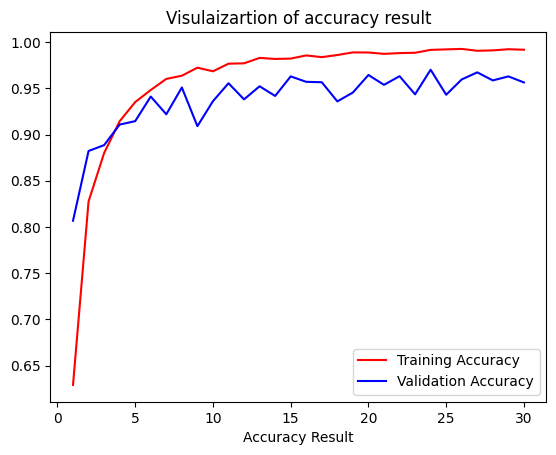

In [27]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.xlabel("Accuracy Result")
plt.title("Visulaizartion of accuracy result")
plt.legend()
plt.show()

In [28]:
class_name = validation_set.class_names
class_name


['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [29]:
test_set = keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4585 files belonging to 10 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

144/144 [==============================] - 3s 18ms/step


(array([[9.9999905e-01, 3.5002589e-08, 4.3008348e-09, ..., 9.7710324e-07,
         1.8124143e-17, 1.5953498e-12],
        [1.0000000e+00, 8.0435575e-11, 9.1907445e-15, ..., 2.9852568e-10,
         7.6387286e-20, 1.7175859e-16],
        [1.0000000e+00, 1.9212694e-12, 1.7058342e-14, ..., 5.9887165e-11,
         2.3152835e-20, 1.4121848e-16],
        ...,
        [3.7728704e-13, 6.9814480e-15, 3.4298040e-09, ..., 1.6969030e-15,
         4.4665165e-15, 1.0000000e+00],
        [1.5079225e-10, 5.5246767e-15, 6.7428951e-11, ..., 1.1342043e-14,
         6.0989946e-16, 1.0000000e+00],
        [1.7258308e-21, 2.1027433e-25, 6.3308598e-15, ..., 3.9509478e-21,
         3.4055272e-21, 1.0000000e+00]], dtype=float32),
 (4585, 10))

In [31]:
predication_categories = tf.argmax(y_pred,axis=1)

In [32]:
predication_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [33]:
true_categories = tf.concat([y for x,y in test_set] ,axis=0)
true_categories

<tf.Tensor: shape=(4585, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [34]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [35]:
from sklearn.metrics import classification_report , confusion_matrix

In [36]:
print(classification_report(Y_true,predication_categories,target_names = class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.99      0.98      0.98       425
                        Tomato___Early_blight       0.98      0.86      0.92       480
                         Tomato___Late_blight       0.93      0.96      0.95       463
                           Tomato___Leaf_Mold       0.93      0.99      0.96       470
                  Tomato___Septoria_leaf_spot       0.90      0.94      0.92       436
Tomato___Spider_mites Two-spotted_spider_mite       0.95      0.98      0.96       435
                         Tomato___Target_Spot       0.96      0.87      0.91       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      1.00      0.99       490
                 Tomato___Tomato_mosaic_virus       0.99      1.00      0.99       448
                             Tomato___healthy       0.96      0.99      0.97       481

                                     accu

In [37]:
cm = confusion_matrix(Y_true,predication_categories)
cm.shape

(10, 10)

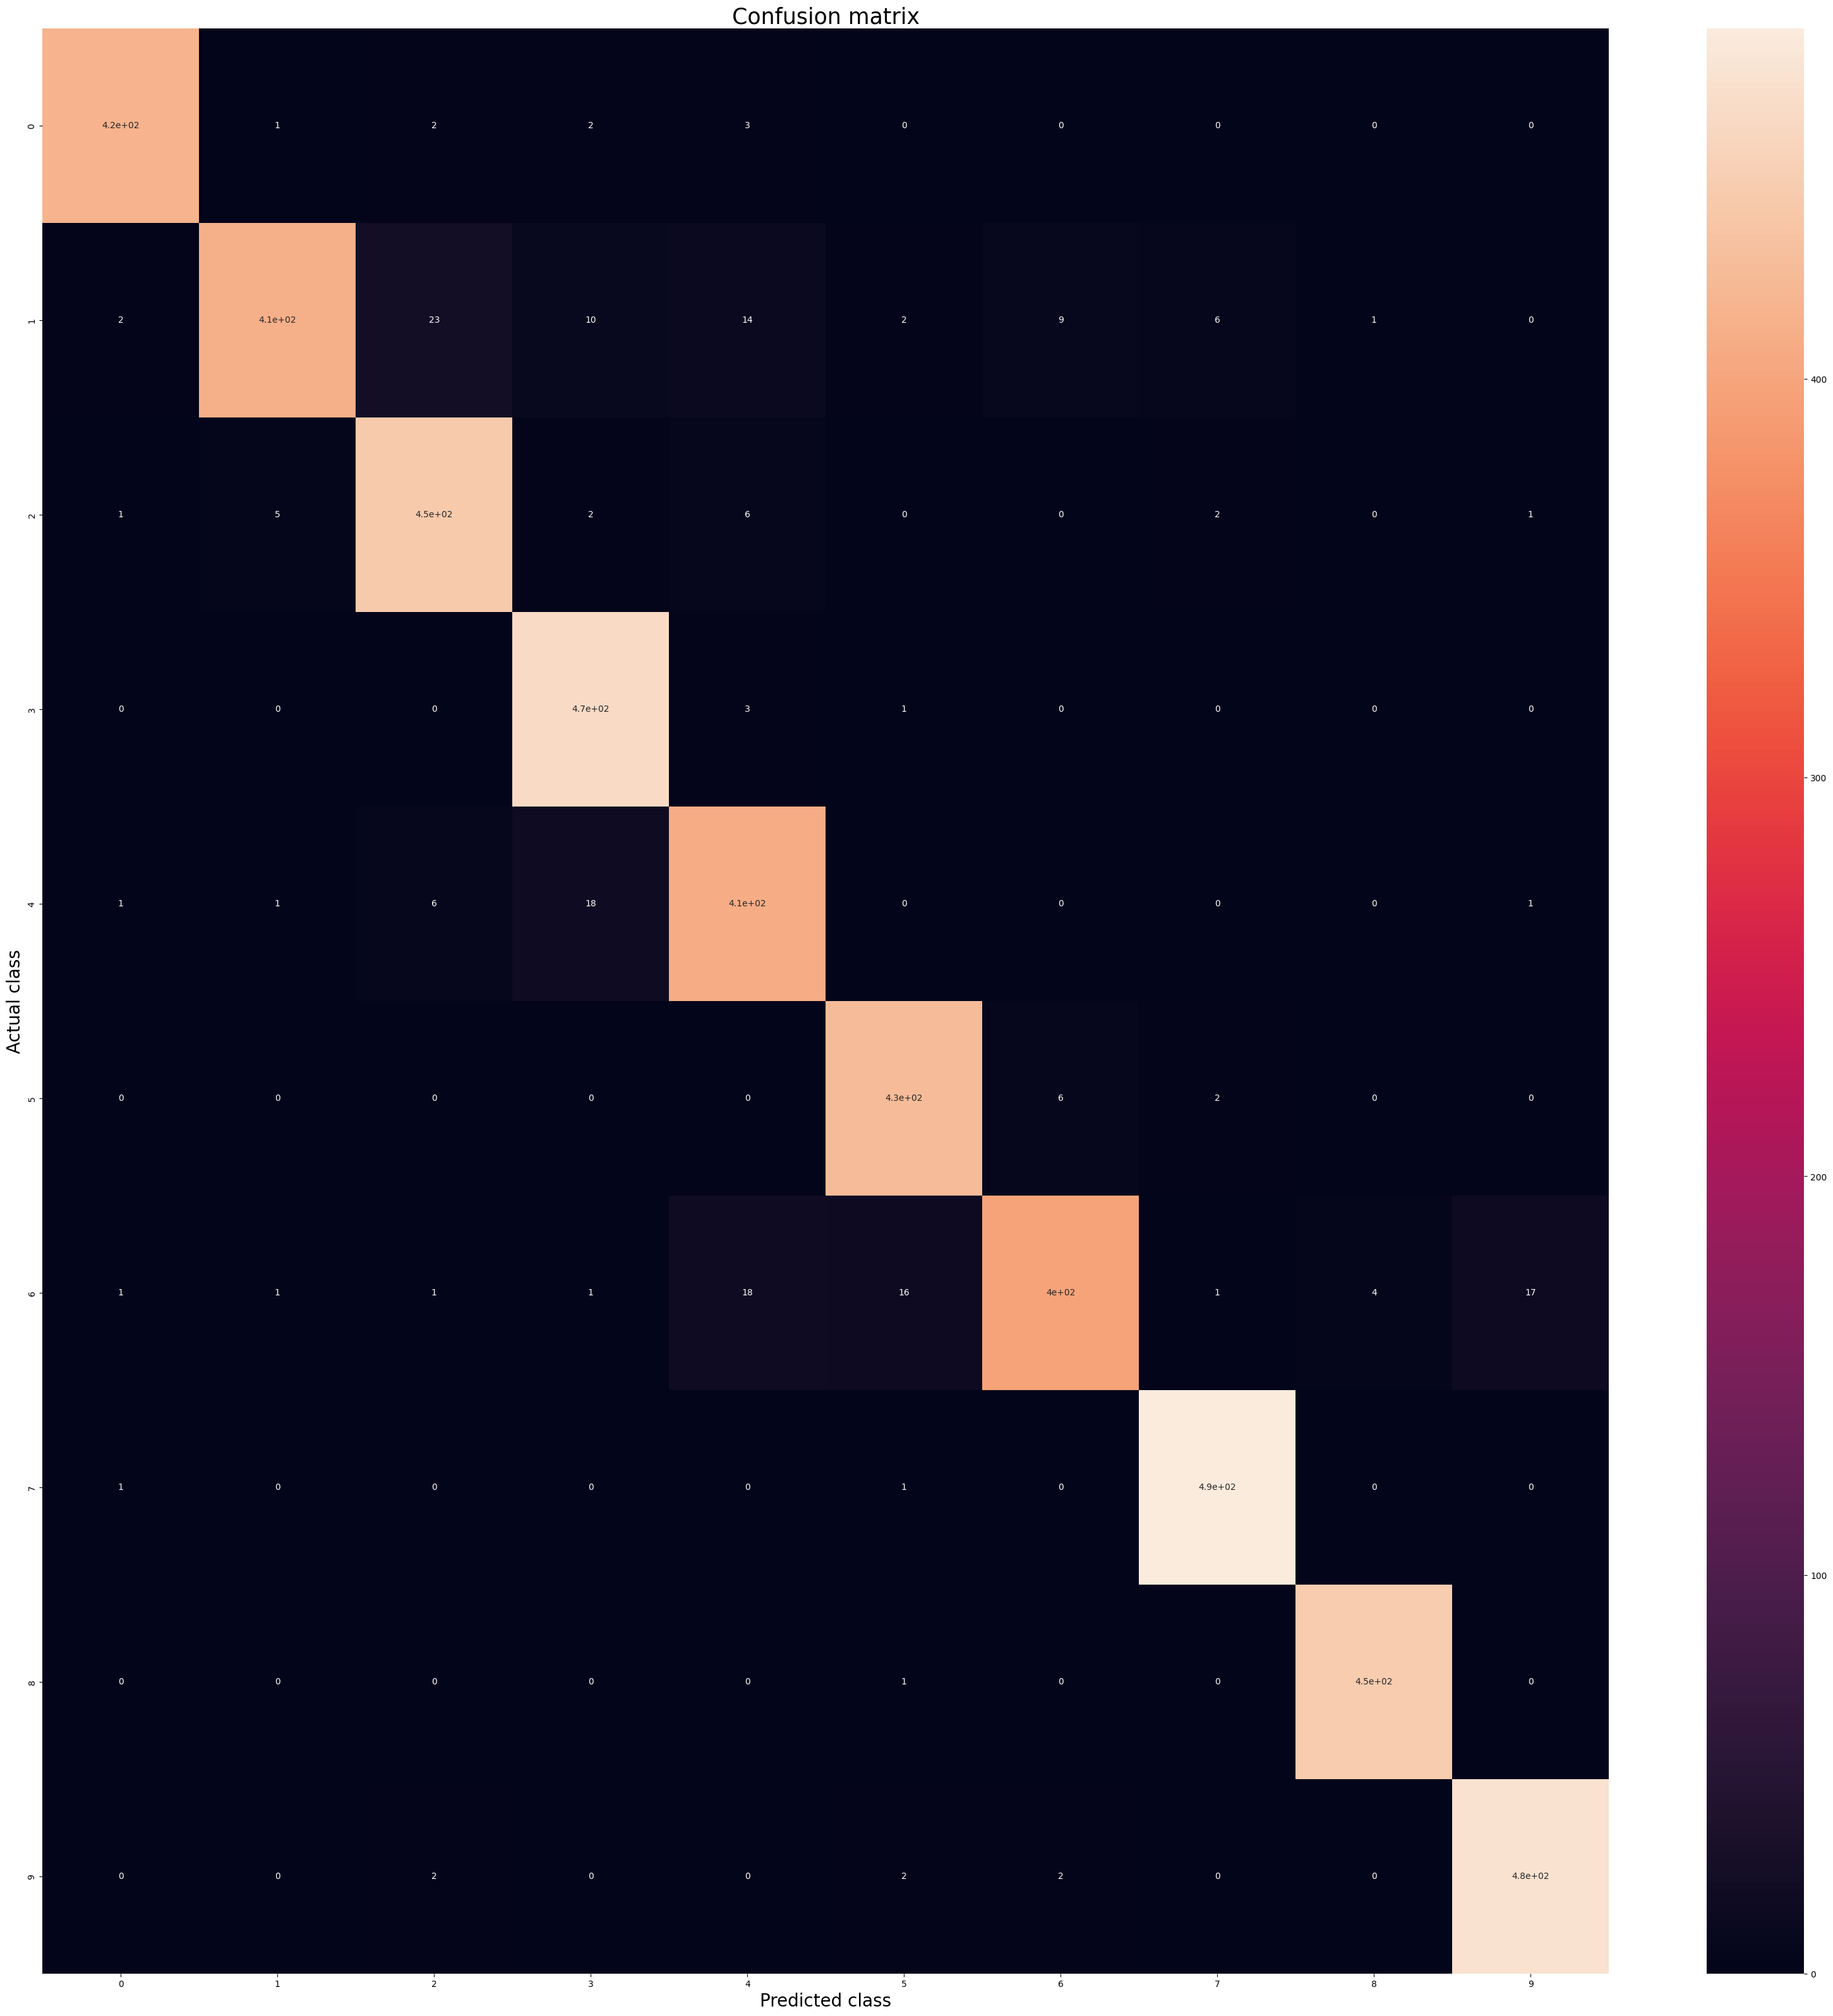

In [38]:
plt.figure(figsize=(40,40))
sns.heatmap(cm , annot = True , annot_kws = {'size':10})
plt.xlabel("Predicted class" , fontsize = 20)
plt.ylabel("Actual class", fontsize = 20)
plt.title("Confusion matrix",fontsize = 25)
plt.show()